# Methods of visualising and utilising anm flagged data

In [1]:
# setwd('./College/ssen/ssen_weather_combine')
data <- read.csv("./database/combined_ssen_weather.csv", header=TRUE, sep=",", dec=".")

In [2]:
as.POSIXct(min(data$dt..37),origin="1970-01-01")
as.POSIXct(max(data$dt..37),origin="1970-01-01")

[1] "2019-01-16 22:40:00 GMT"

[1] "2019-10-27 21:40:00 GMT"

In [3]:
summary(data)

      X.1                     elec_timestamp       demand        demand_max   
 Min.   :     1   2019-10-27 01:00:05:     2   Min.   : 0.71   Min.   :35.70  
 1st Qu.: 98765   2019-10-27 01:01:05:     2   1st Qu.:12.46   1st Qu.:35.70  
 Median :197528   2019-10-27 01:02:05:     2   Median :14.85   Median :35.70  
 Mean   :197528   2019-10-27 01:03:05:     2   Mean   :15.23   Mean   :35.70  
 3rd Qu.:296292   2019-10-27 01:04:05:     2   3rd Qu.:17.80   3rd Qu.:35.70  
 Max.   :395055   2019-10-27 01:05:06:     2   Max.   :39.69   Max.   :39.69  
                  (Other)            :395043                                  
 anm_generated    non_anm_generated total_generation_capacity
 Min.   : 0.000   Min.   : 0.000    Min.   :57.10            
 1st Qu.: 1.629   1st Qu.: 3.446    1st Qu.:57.10            
 Median : 5.092   Median : 9.008    Median :57.10            
 Mean   : 6.640   Mean   : 9.843    Mean   :57.11            
 3rd Qu.:10.969   3rd Qu.:15.540    3rd Qu.:57.10         

In [3]:
# generate column with dates as correct datetime type
data$dt <- as.POSIXct(data$elec_timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT")

In [4]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=12, repr.plot.height=6)
#library allowoing alpha blend colour
library(scales)

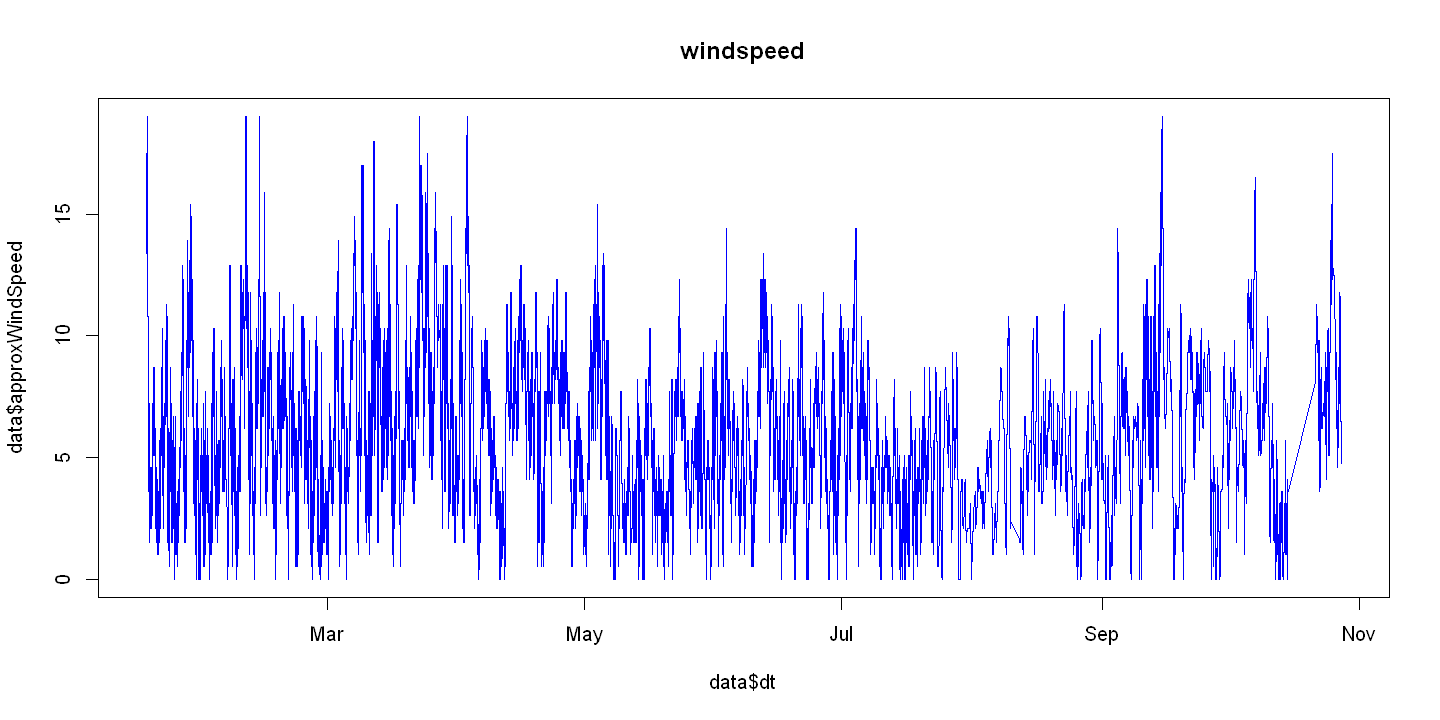

In [6]:
# plot windspeed over year
plot(data$dt, data$approxWindSpeed, main= "windspeed", type= "l", col = "blue")

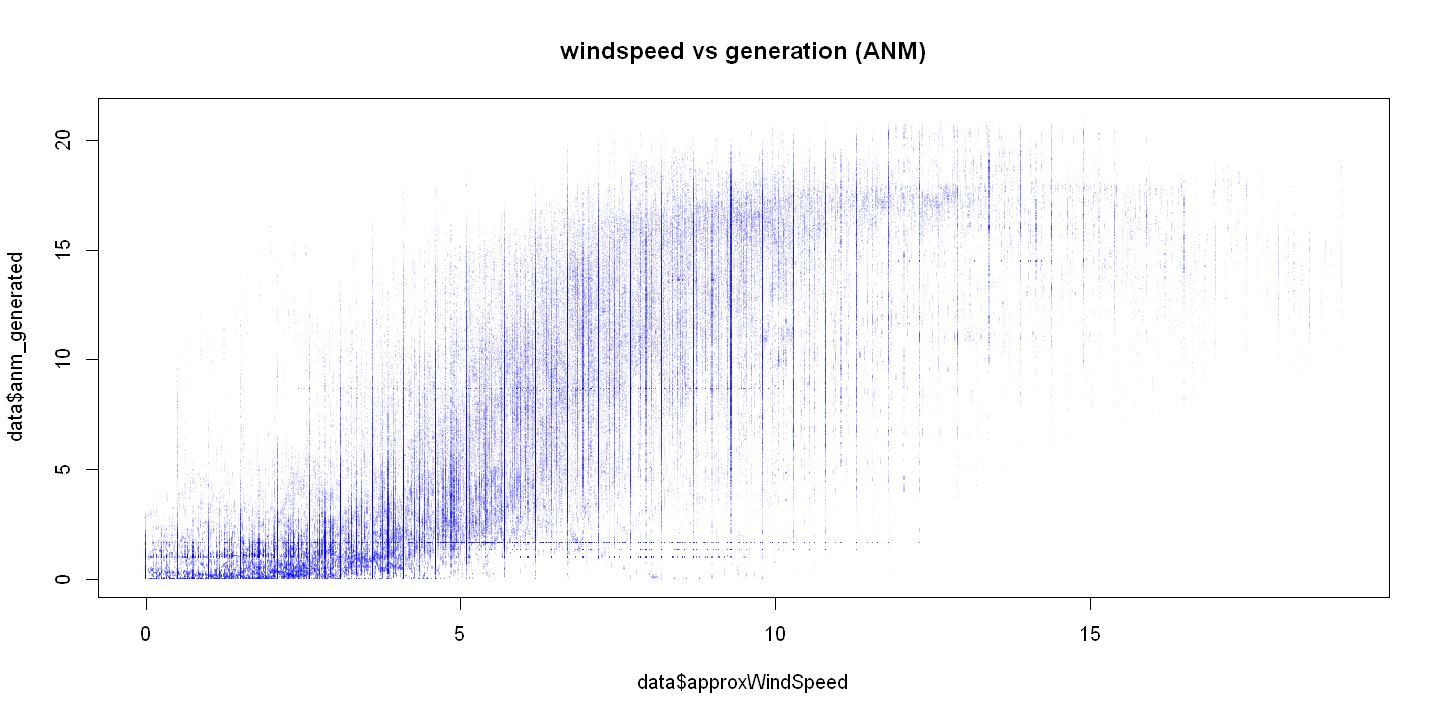

In [7]:
plot(data$approxWindSpeed, data$anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

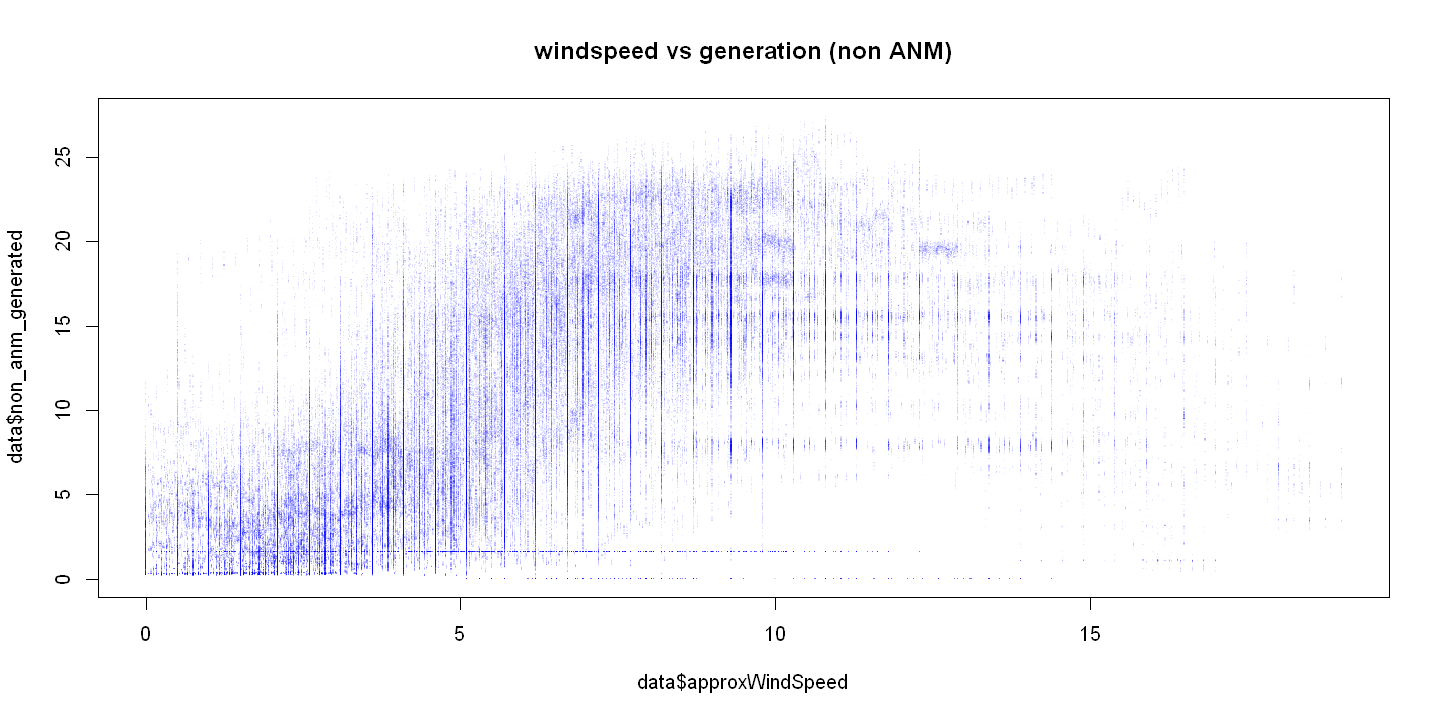

In [8]:
plot(data$approxWindSpeed, data$non_anm_generated, main='windspeed vs generation (non ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

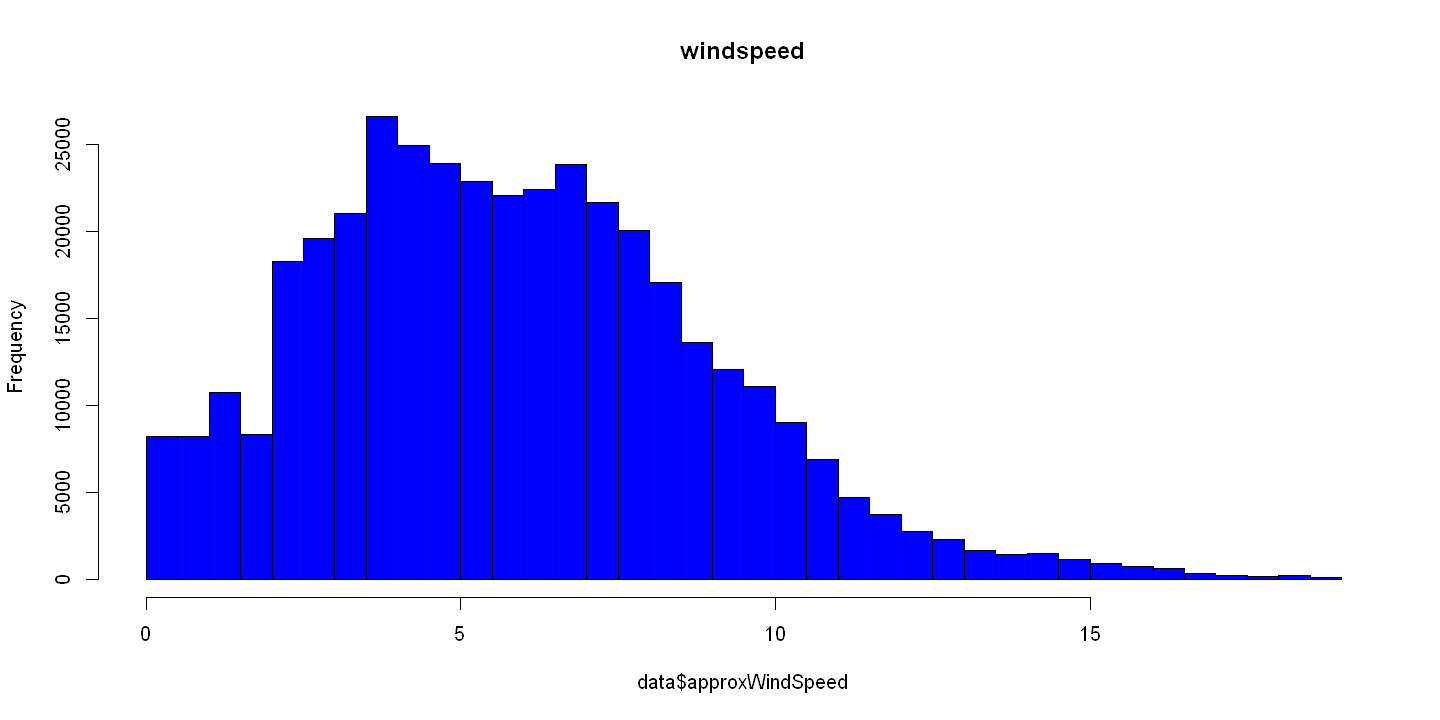

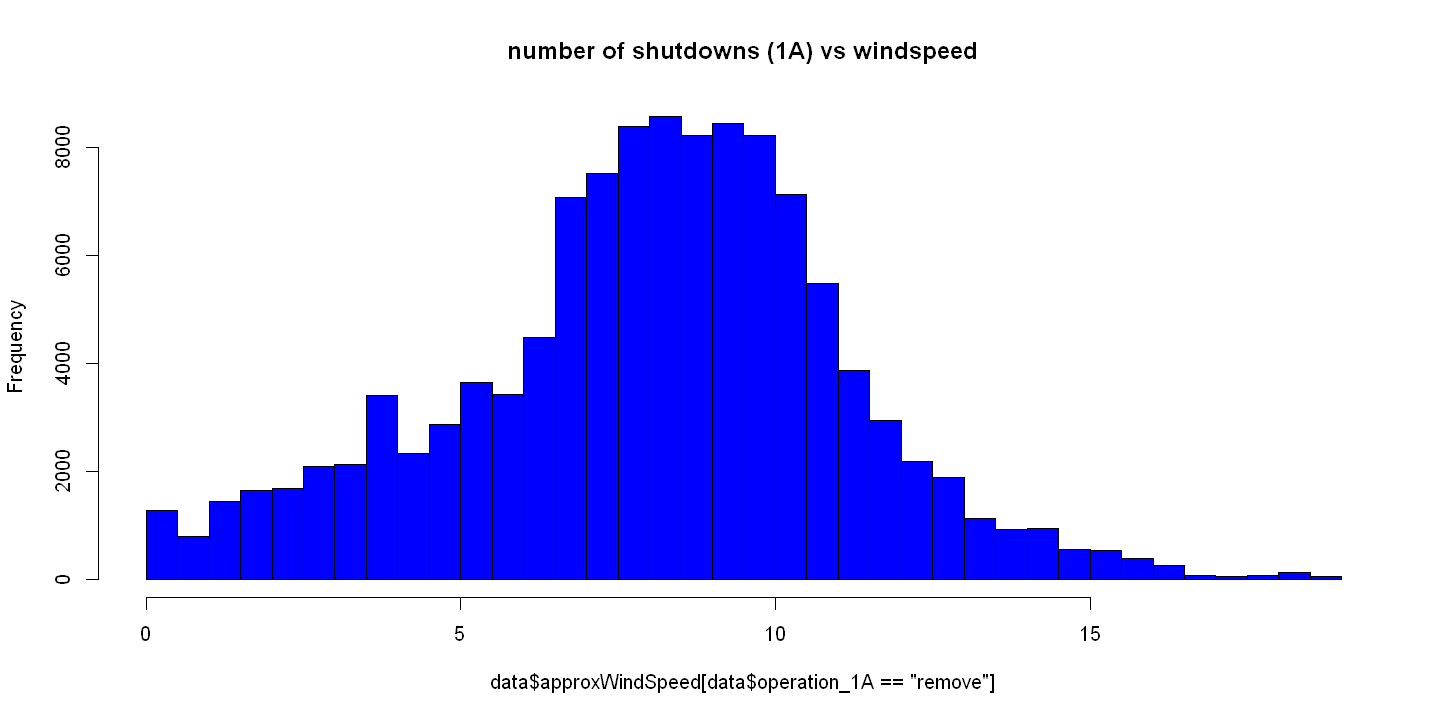

In [9]:
hist(data$approxWindSpeed, 60,main= "windspeed", col = "blue")
hist(data$approxWindSpeed[data$operation_1A=="remove"], 60,main= "number of shutdowns (1A) vs windspeed", col = "blue")

In [5]:
unique(data$operation_core)
levels(data$operation_core)

[1] ok      warning remove 
Levels: ok remove warning

[1] "ok"      "remove"  "warning"

In [6]:
anmlabels <- c(0,1,2)
names(anmlabels) <- c("ok", "warning", "remove")

anmlabels

ok warning  remove 
      0       1       2

In [7]:
data$operation_core[1]
anmlabels["ok"]
anmlabels[data$operation_core[1]]

[1] ok
Levels: ok remove warning

ok 
 0

ok 
 0

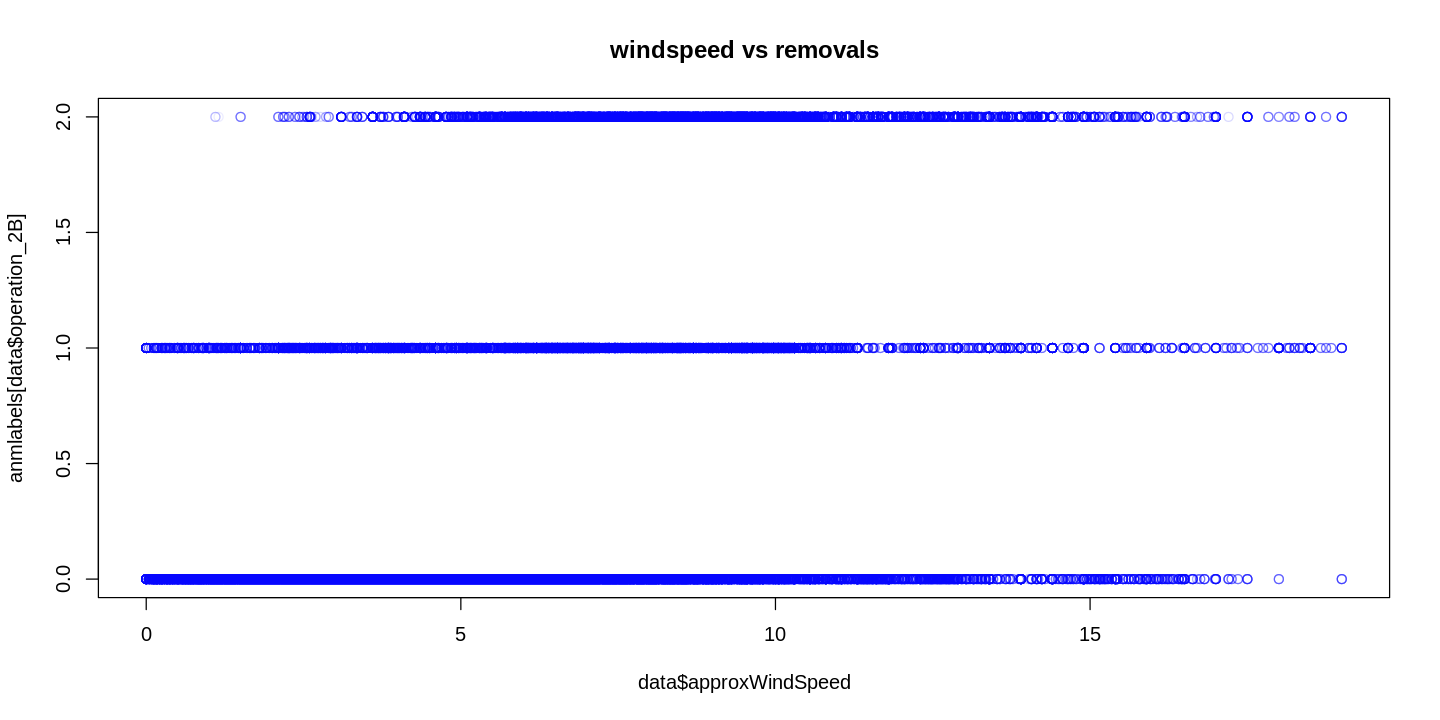

In [8]:
plot(data$approxWindSpeed, anmlabels[data$operation_2B], main='windspeed vs removals',col=alpha(c("blue"), 0.08), type="p")

In [9]:
anmlabels <- c(0,1,2)
data$anmcount <- anmlabels[data$operation_core]+
  anmlabels[data$operation_1]+
  anmlabels[data$operation_1A]+
  anmlabels[data$operation_2]+
  anmlabels[data$operation_2A]+
  anmlabels[data$operation_2B]+
  anmlabels[data$operation_3]+
  anmlabels[data$operation_4]+
  anmlabels[data$operation_4A]

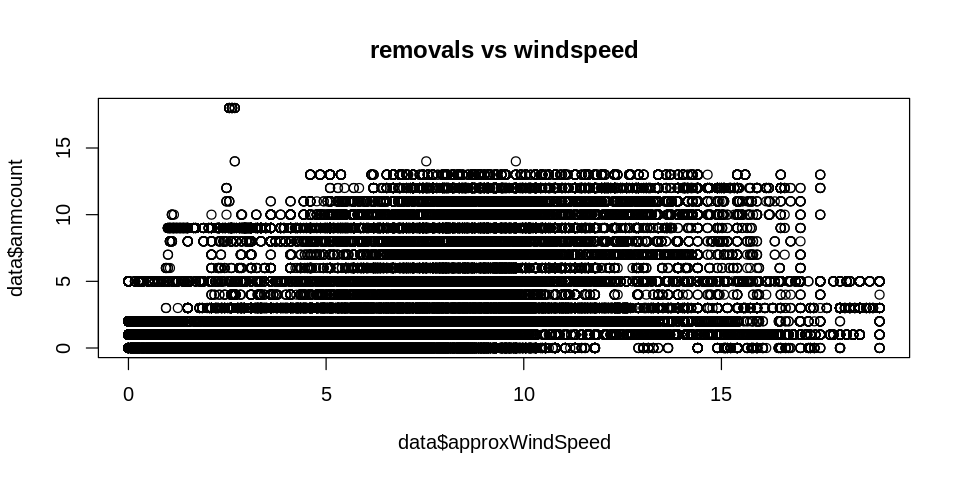

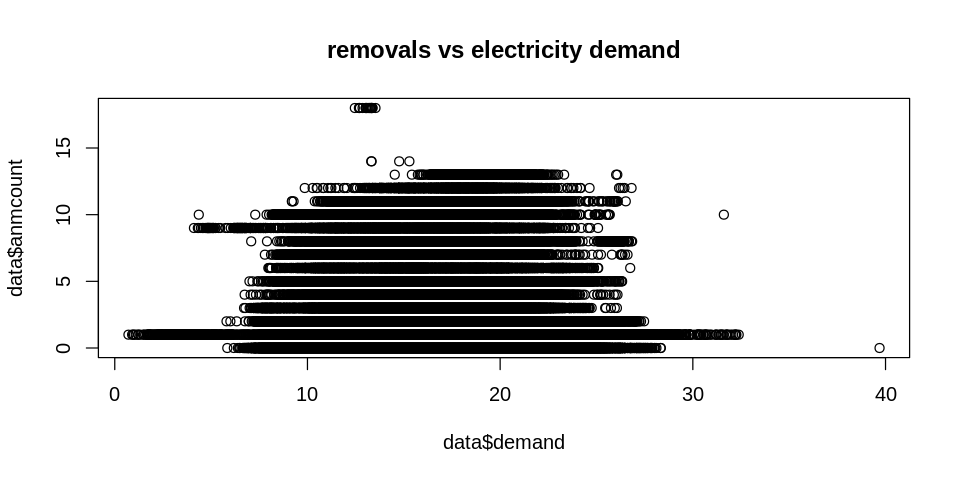

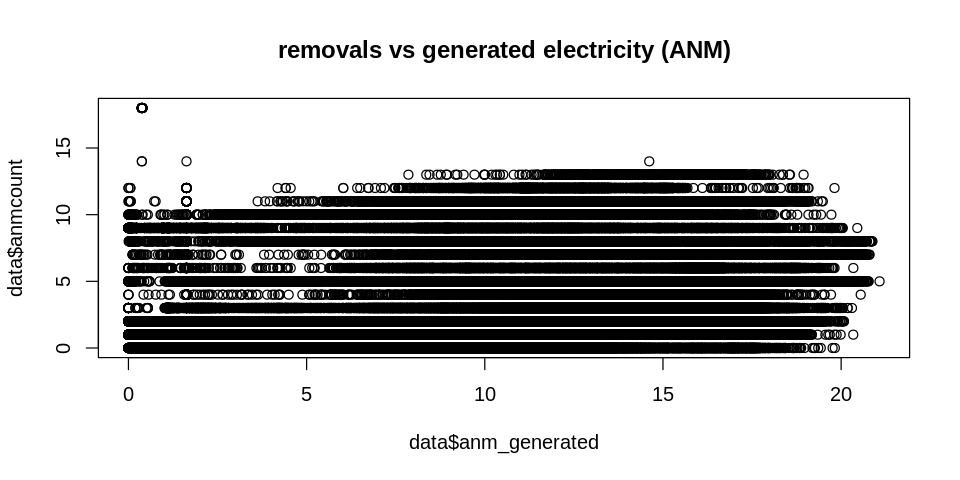

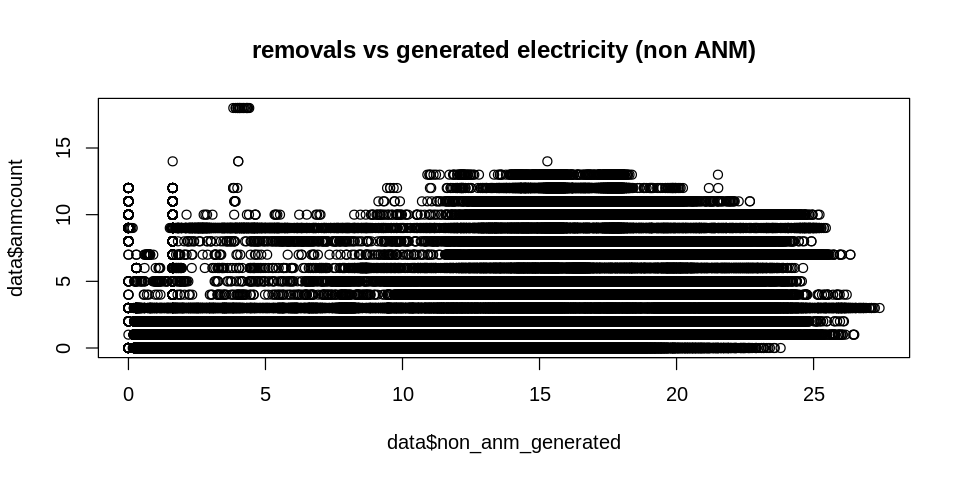

In [10]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=8, repr.plot.height=4)
plot(data$approxWindSpeed, data$anmcount, main='removals vs windspeed', type="p")
plot(data$demand, data$anmcount, main='removals vs electricity demand', type="p")
plot(data$anm_generated, data$anmcount, main='removals vs generated electricity (ANM)', type="p")
plot(data$non_anm_generated, data$anmcount, main='removals vs generated electricity (non ANM)', type="p")

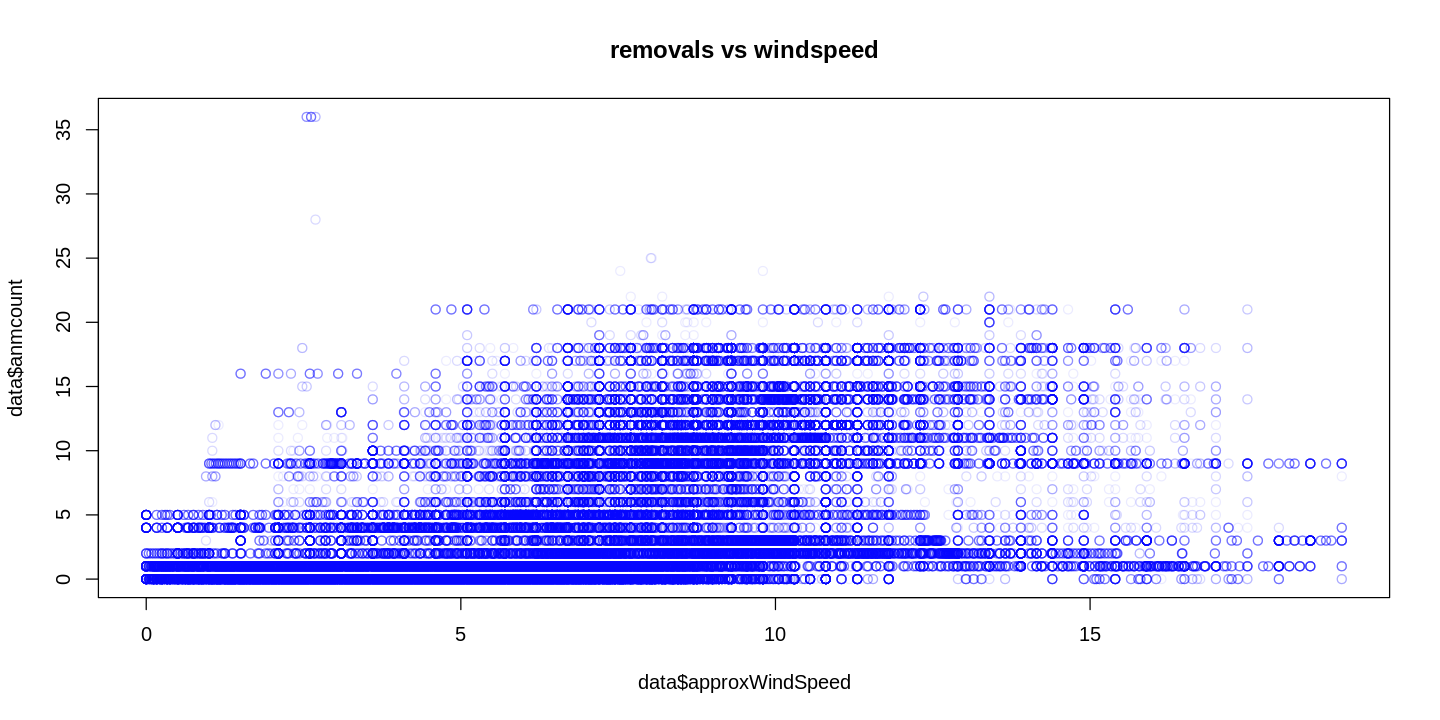

In [18]:
# redraw charts with removals weighted much mre strongly than warnings

anmlabels <- c(0,1,4)
data$anmcount <- anmlabels[data$operation_core]+
  anmlabels[data$operation_1]+
  anmlabels[data$operation_1A]+
  anmlabels[data$operation_2]+
  anmlabels[data$operation_2A]+
  anmlabels[data$operation_2B]+
  anmlabels[data$operation_3]+
  anmlabels[data$operation_4]+
  anmlabels[data$operation_4A]

plot(data$approxWindSpeed, data$anmcount, main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")

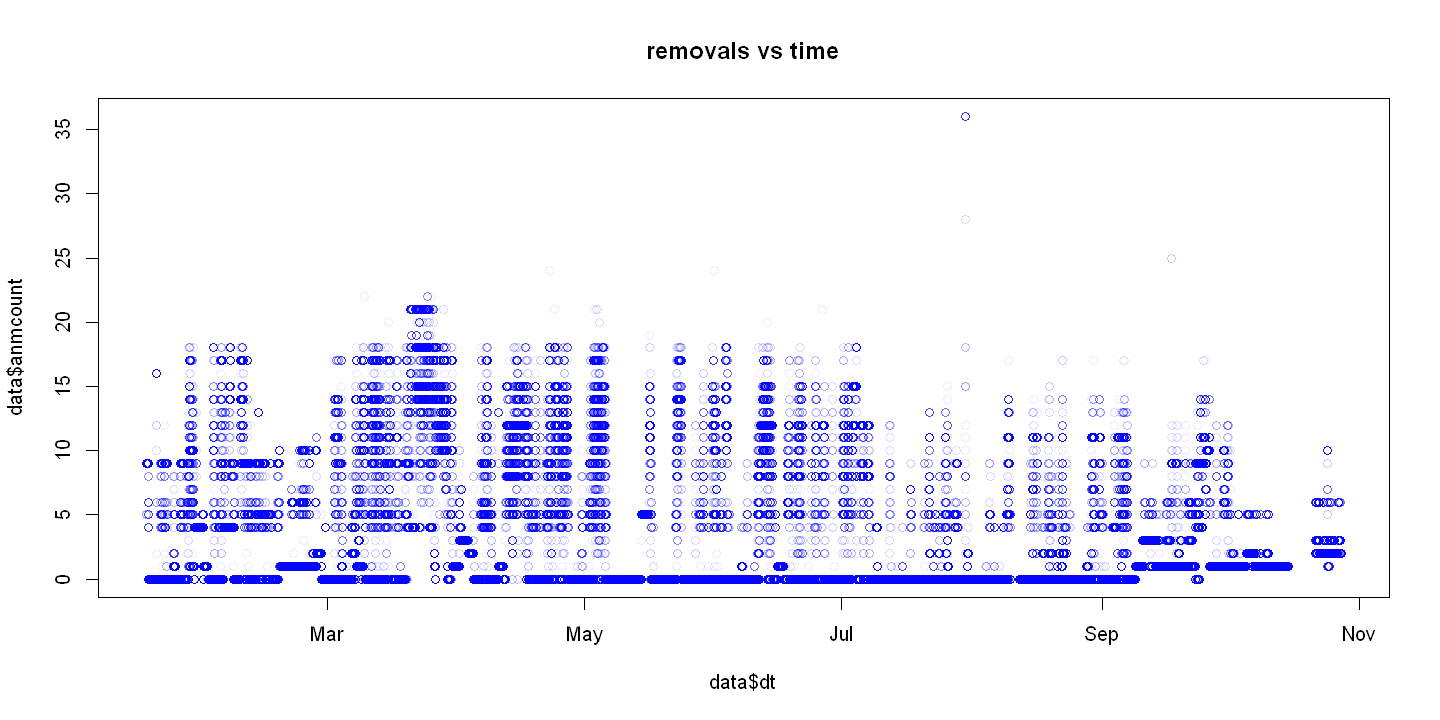

In [50]:
plot(data$dt, data$anmcount, main='removals vs time',col=alpha(c("blue"), 0.08), type="p")

In [75]:
data$dt[data$anmcount>25]

 [1] "2019-07-30 14:04:05 GMT" "2019-07-30 14:05:04 GMT"
 [3] "2019-07-30 14:06:05 GMT" "2019-07-30 14:07:05 GMT"
 [5] "2019-07-30 14:08:05 GMT" "2019-07-30 14:09:05 GMT"
 [7] "2019-07-30 14:10:05 GMT" "2019-07-30 14:11:05 GMT"
 [9] "2019-07-30 14:12:05 GMT" "2019-07-30 14:13:05 GMT"
[11] "2019-07-30 14:14:05 GMT" "2019-07-30 14:15:04 GMT"
[13] "2019-07-30 14:16:05 GMT" "2019-07-30 14:17:05 GMT"
[15] "2019-07-30 14:18:05 GMT" "2019-07-30 14:19:05 GMT"
[17] "2019-07-30 14:20:05 GMT" "2019-07-30 14:21:05 GMT"
[19] "2019-07-30 14:22:04 GMT" "2019-07-30 14:23:04 GMT"
[21] "2019-07-30 14:24:05 GMT" "2019-07-30 14:25:05 GMT"
[23] "2019-07-30 14:26:04 GMT"

In [77]:
data$dt[data$dt>as.POSIXct("2019-07-30 14:04:05 GMT",format="%Y-%m-%d %H:%M:%S",tz="GMT")&data$dt<as.POSIXct("2019-07-30 14:25:05 GMT",format="%Y-%m-%d %H:%M:%S",tz="GMT")]

 [1] "2019-07-30 14:05:04 GMT" "2019-07-30 14:06:05 GMT"
 [3] "2019-07-30 14:07:05 GMT" "2019-07-30 14:08:05 GMT"
 [5] "2019-07-30 14:09:05 GMT" "2019-07-30 14:10:05 GMT"
 [7] "2019-07-30 14:11:05 GMT" "2019-07-30 14:12:05 GMT"
 [9] "2019-07-30 14:13:05 GMT" "2019-07-30 14:14:05 GMT"
[11] "2019-07-30 14:15:04 GMT" "2019-07-30 14:16:05 GMT"
[13] "2019-07-30 14:17:05 GMT" "2019-07-30 14:18:05 GMT"
[15] "2019-07-30 14:19:05 GMT" "2019-07-30 14:20:05 GMT"
[17] "2019-07-30 14:21:05 GMT" "2019-07-30 14:22:04 GMT"
[19] "2019-07-30 14:23:04 GMT" "2019-07-30 14:24:05 GMT"

In [73]:
data[data$anmcount>25, c(36,43)]

,dt,anmcount
,<dttm>,<dbl>
279123,2019-07-30 14:04:05,28
279124,2019-07-30 14:05:04,28
279125,2019-07-30 14:06:05,36
279126,2019-07-30 14:07:05,36
279127,2019-07-30 14:08:05,36
279128,2019-07-30 14:09:05,36
279129,2019-07-30 14:10:05,36
279130,2019-07-30 14:11:05,36
279131,2019-07-30 14:12:05,36


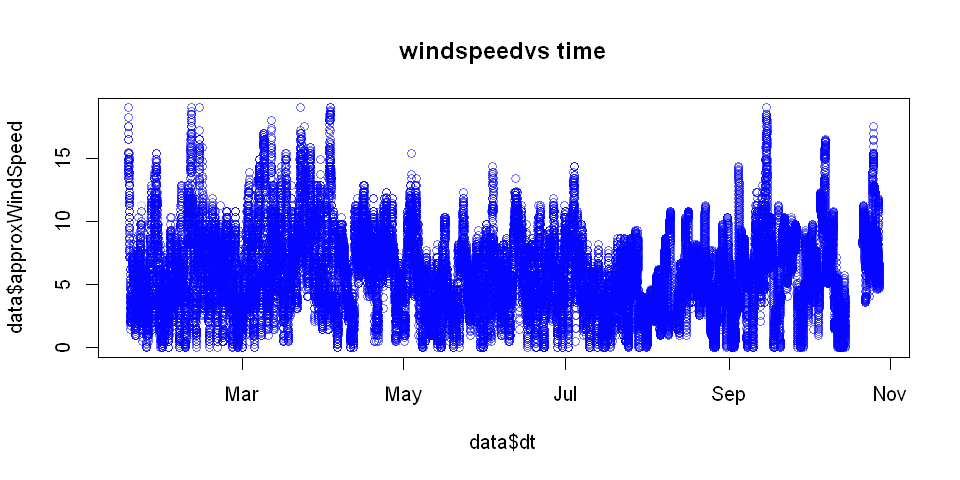

In [18]:
plot(data$dt, data$approxWindSpeed, main='windspeedvs time',col=alpha(c("blue"), 0.08), type="p")

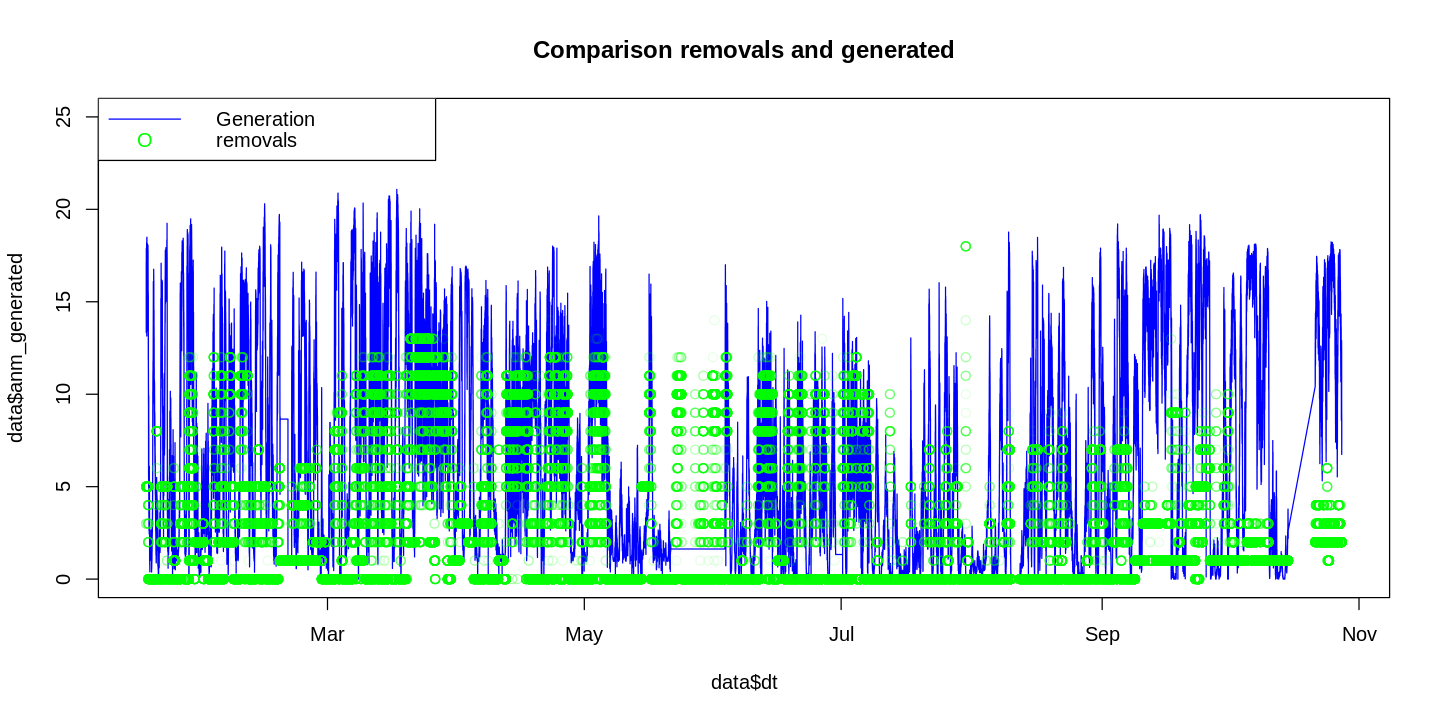

In [16]:
# plot windspeed over year
options(repr.plot.width=12, repr.plot.height=6)
plot(data$dt, data$anm_generated, main= "Comparison removals and generated", type= "l", col = alpha(c("blue", 0.5)), pch=46, ylim=c(0, 25))
points(data$dt, data$anmcount, type= "p", col=alpha(c("green"), 0.1 ))
legend("topleft", legend=c("Generation", "removals"),
       col=c("blue", "green"), lty=c(1,NA),pch=c(NA,'O'))

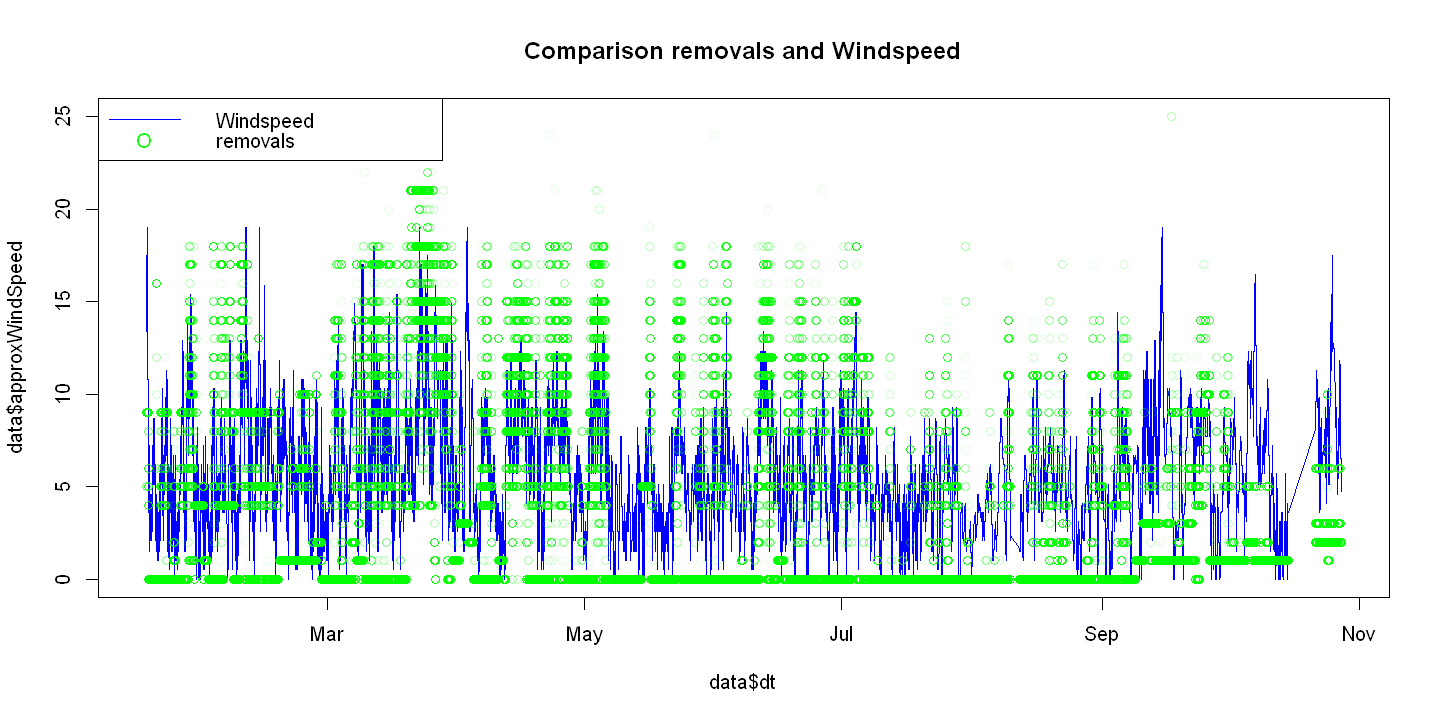

In [49]:
# plot windspeed over year
options(repr.plot.width=12, repr.plot.height=6)
plot(data$dt, data$approxWindSpeed, main= "Comparison removals and Windspeed", type= "l", col = alpha(c("blue", 0.5)), pch=46, ylim=c(0, 25))
points(data$dt, data$anmcount, type= "p", col=alpha(c("green"), 0.1 ))
legend("topleft", legend=c("Windspeed", "removals"),
       col=c("blue", "green"), lty=c(1,NA),pch=c(NA,'O'))

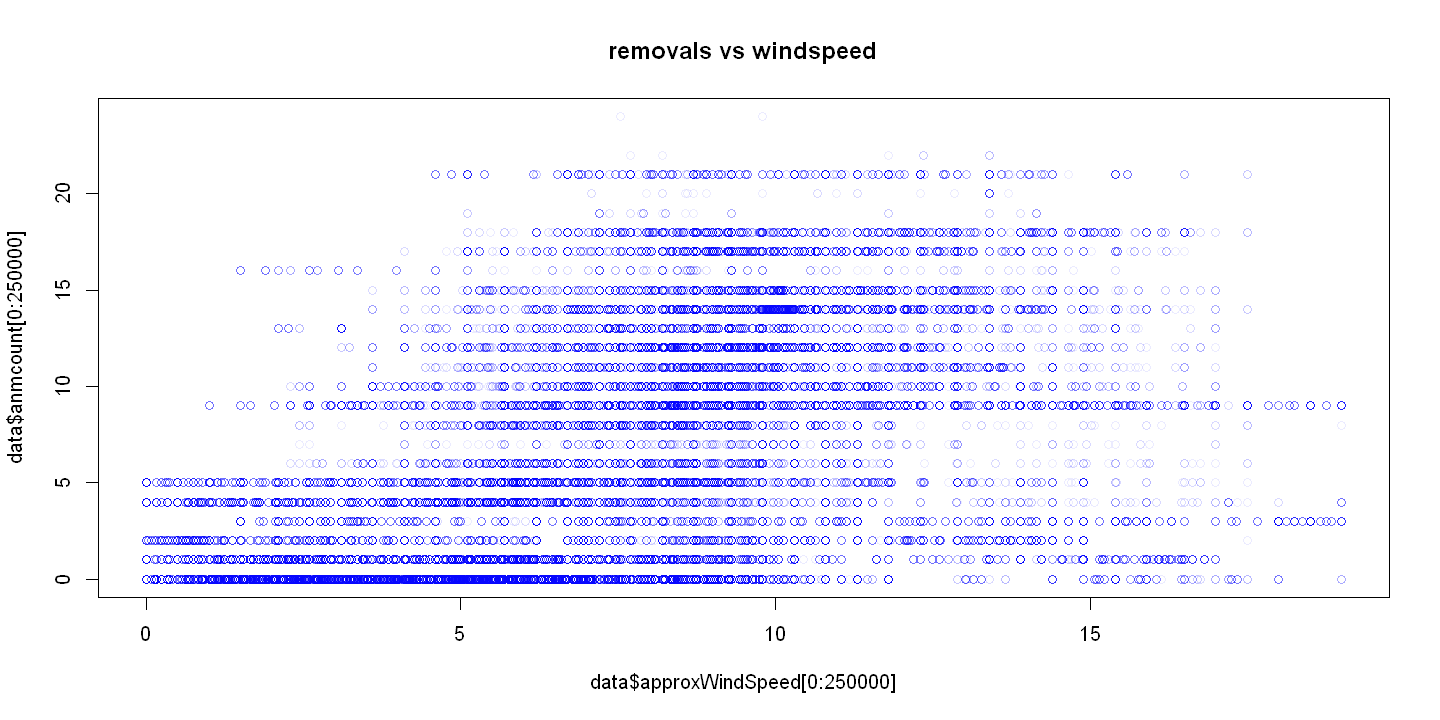

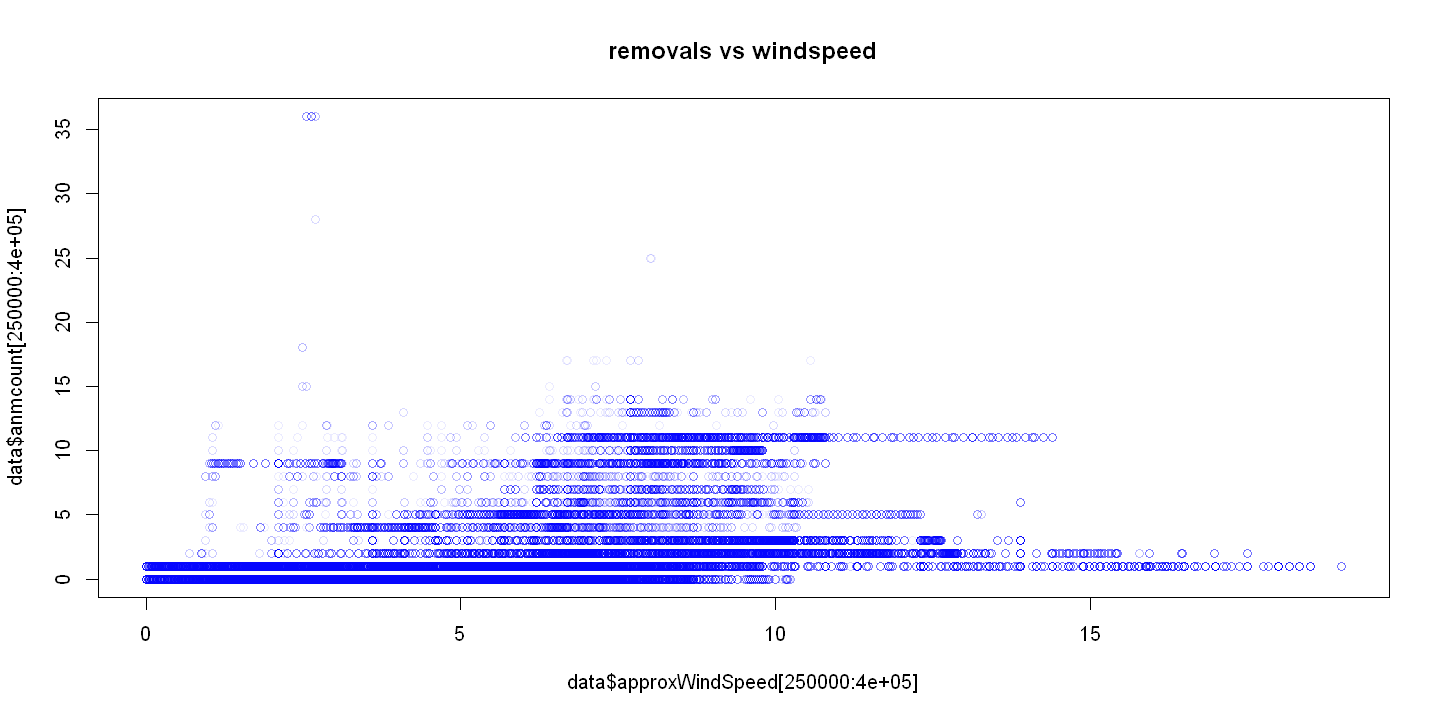

In [37]:
plot(data$approxWindSpeed[0:250000], data$anmcount[0:250000], main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")
plot(data$approxWindSpeed[250000:400000], data$anmcount[250000:400000], main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")

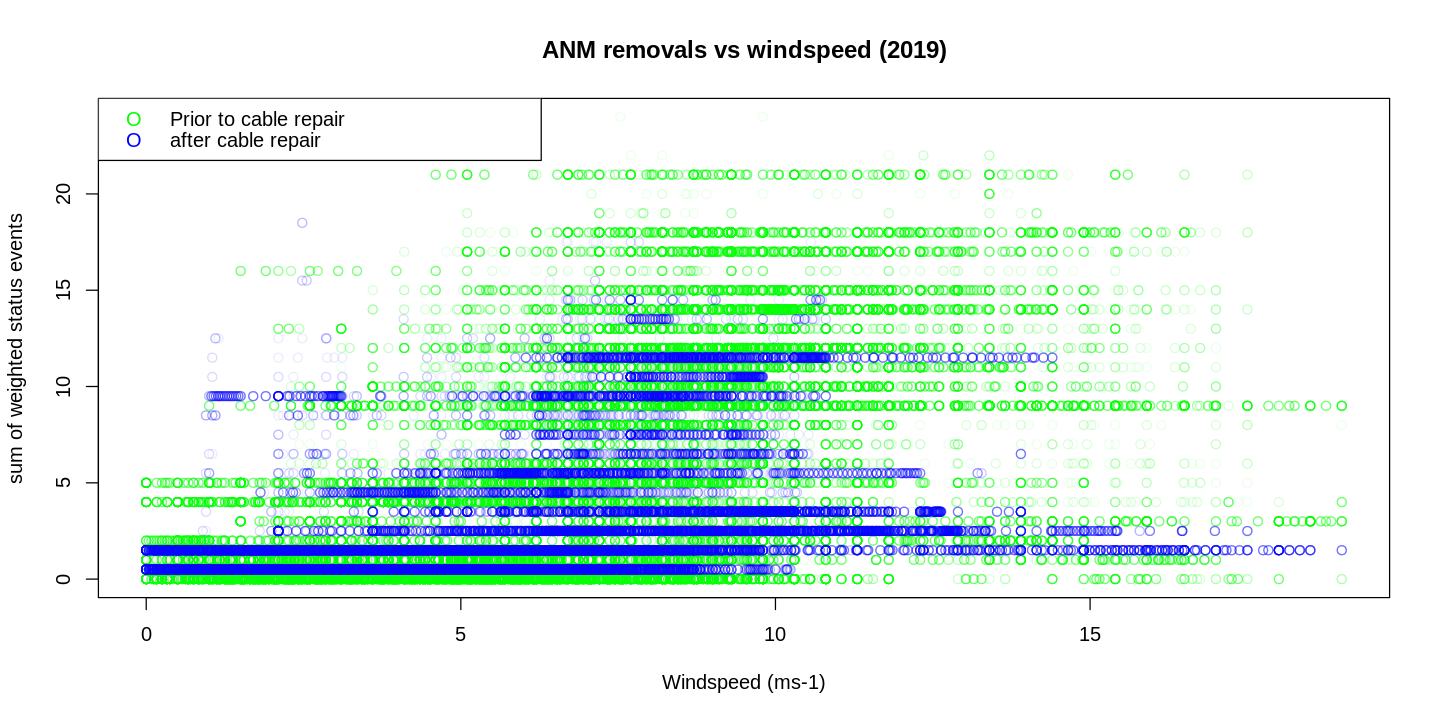

In [22]:
plot(data$approxWindSpeed[0:270000], data$anmcount[0:270000], 
     main='ANM removals vs windspeed (2019)',
     xlab = "Windspeed (ms-1)",
     ylab = "sum of weighted status events",col=alpha(c("green"), 0.08), type="p")
points(data$approxWindSpeed[270000:400000], data$anmcount[270000:400000]+0.5, main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")
legend("topleft", legend=c("Prior to cable repair", "after cable repair"),
       col=c("green", "blue"), pch=c('O','O'))


In [14]:
data$dt[250000]
data$dt[270000]

[1] "2019-07-10 08:20:05 GMT"

[1] "2019-07-24 05:54:05 GMT"

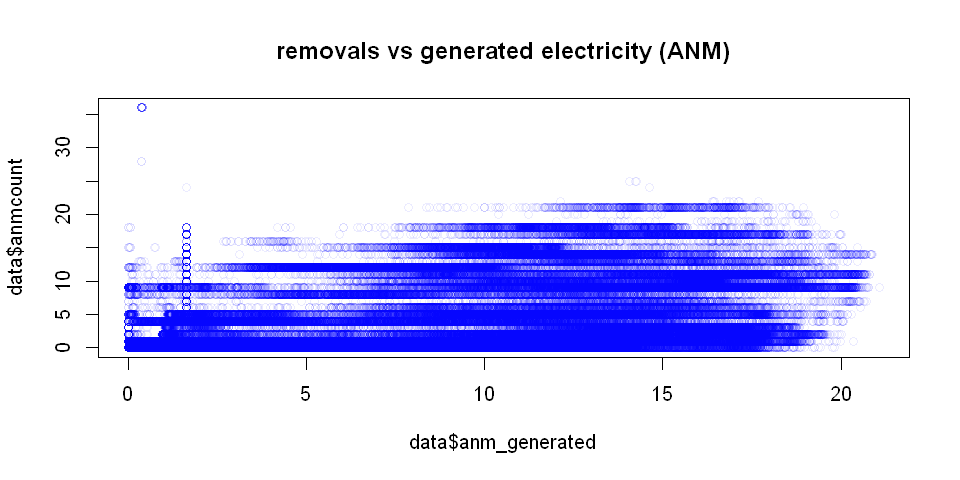

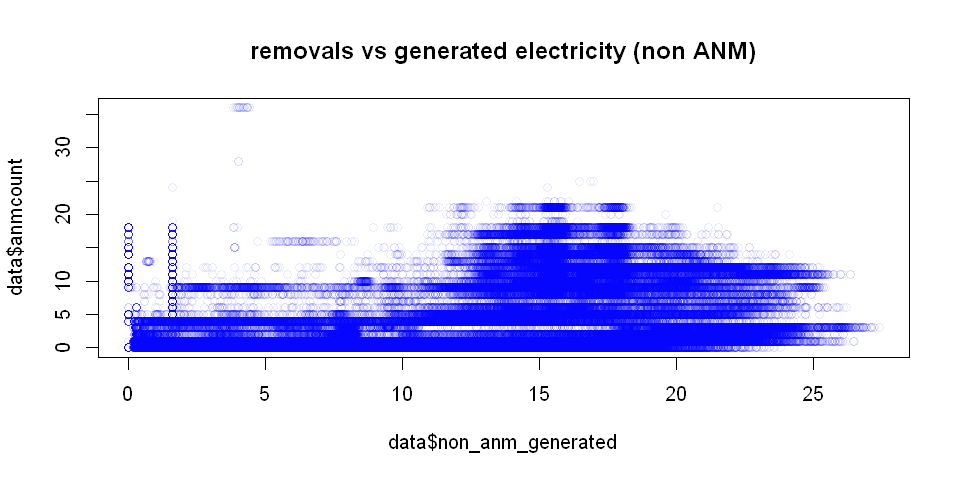

In [20]:
plot(data$anm_generated, data$anmcount, main='removals vs generated electricity (ANM)',col=alpha(c("blue"), 0.08), type="p")
plot(data$non_anm_generated, data$anmcount, main='removals vs generated electricity (non ANM)',col=alpha(c("blue"), 0.08), type="p")

In [21]:
data[1,c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]

,eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [22]:
data[1,c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]
data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]
sapply(data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok")
length(data$elec_timestamp)
rowSums(sapply(data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))
sum(rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))==18)

,eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


,eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
2,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
4,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
5,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
6,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
7,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
8,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
9,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] 395055

[1] 18 18 18 18 18 18 18 18 18 18

[1] 327315

In [23]:
data[rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))!=18, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]

,eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3433,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3434,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3435,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3436,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3437,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3438,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3439,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3440,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3441,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [24]:
filtered_data <- data[rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))==18, ]

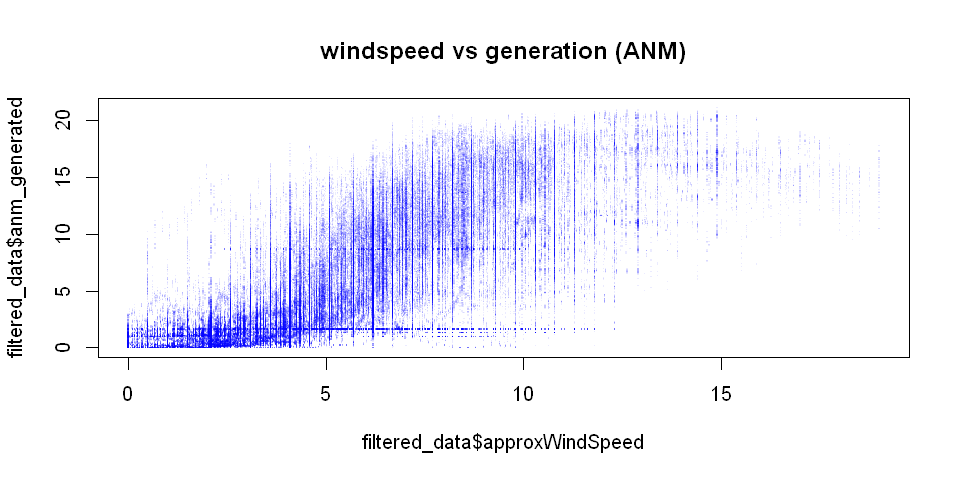

In [25]:
plot(filtered_data$approxWindSpeed, filtered_data$anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

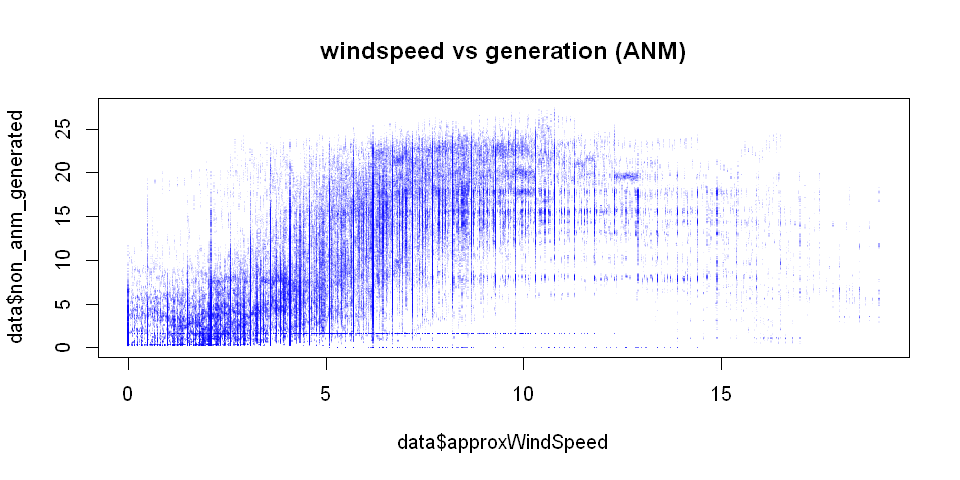

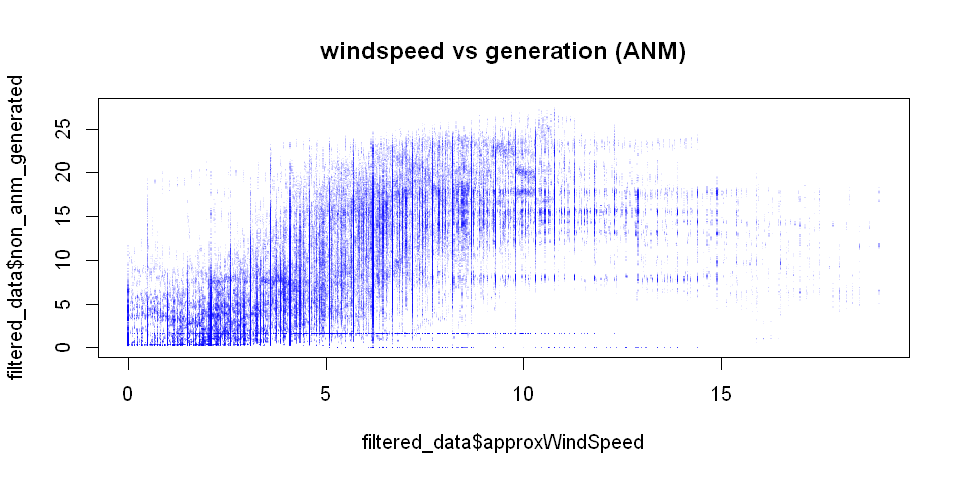

In [26]:
plot(data$approxWindSpeed, data$non_anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)
plot(filtered_data$approxWindSpeed, filtered_data$non_anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

In [27]:
length(data$elec_timestamp)
length(filtered_data$elec_timestamp)
length(filtered_data$approxWindSpeed)

[1] 395055

[1] 327315

[1] 327315

In [44]:
filtered_data$dt[210000]

[1] "2019-06-30 22:10:05 GMT"

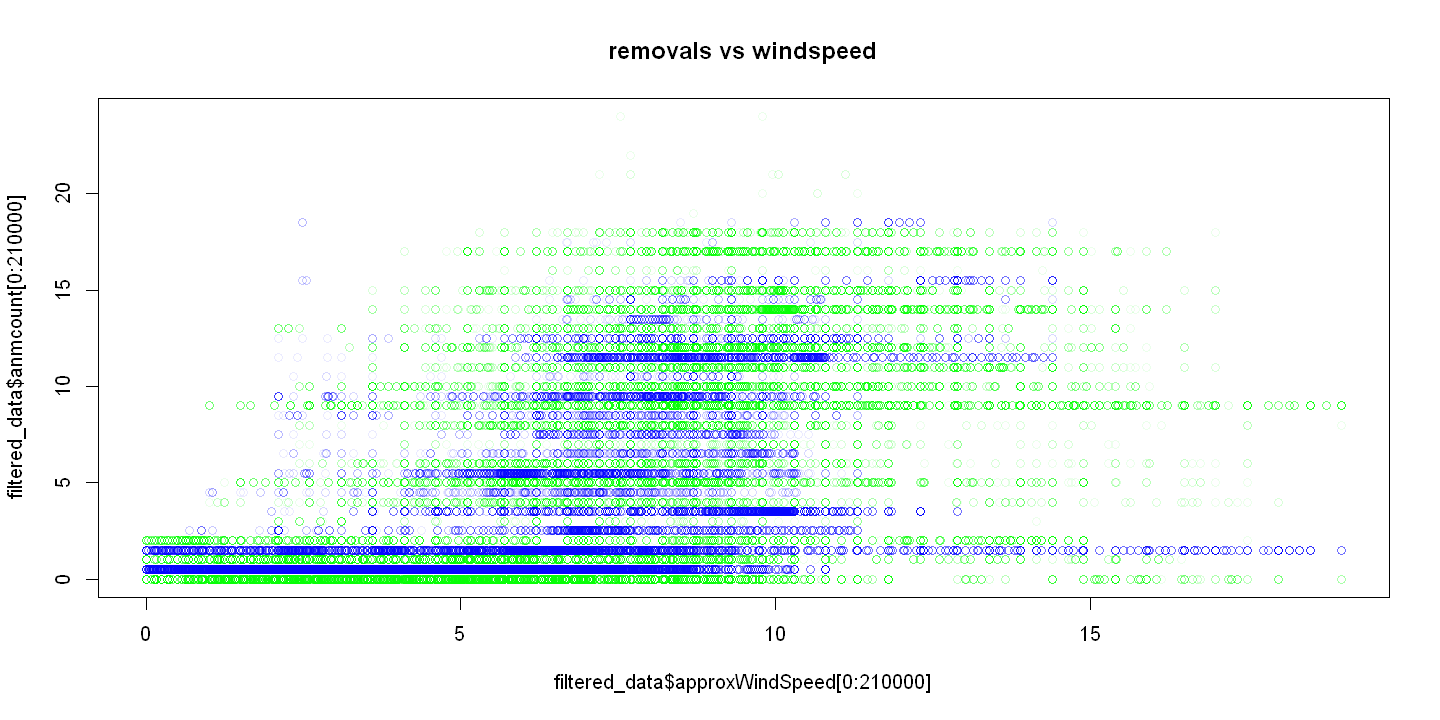

In [45]:
plot(filtered_data$approxWindSpeed[0:210000], filtered_data$anmcount[0:210000], main='removals vs windspeed',col=alpha(c("green"), 0.08), type="p")
points(filtered_data$approxWindSpeed[210000:400000], filtered_data$anmcount[210000:400000]+0.5, main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")


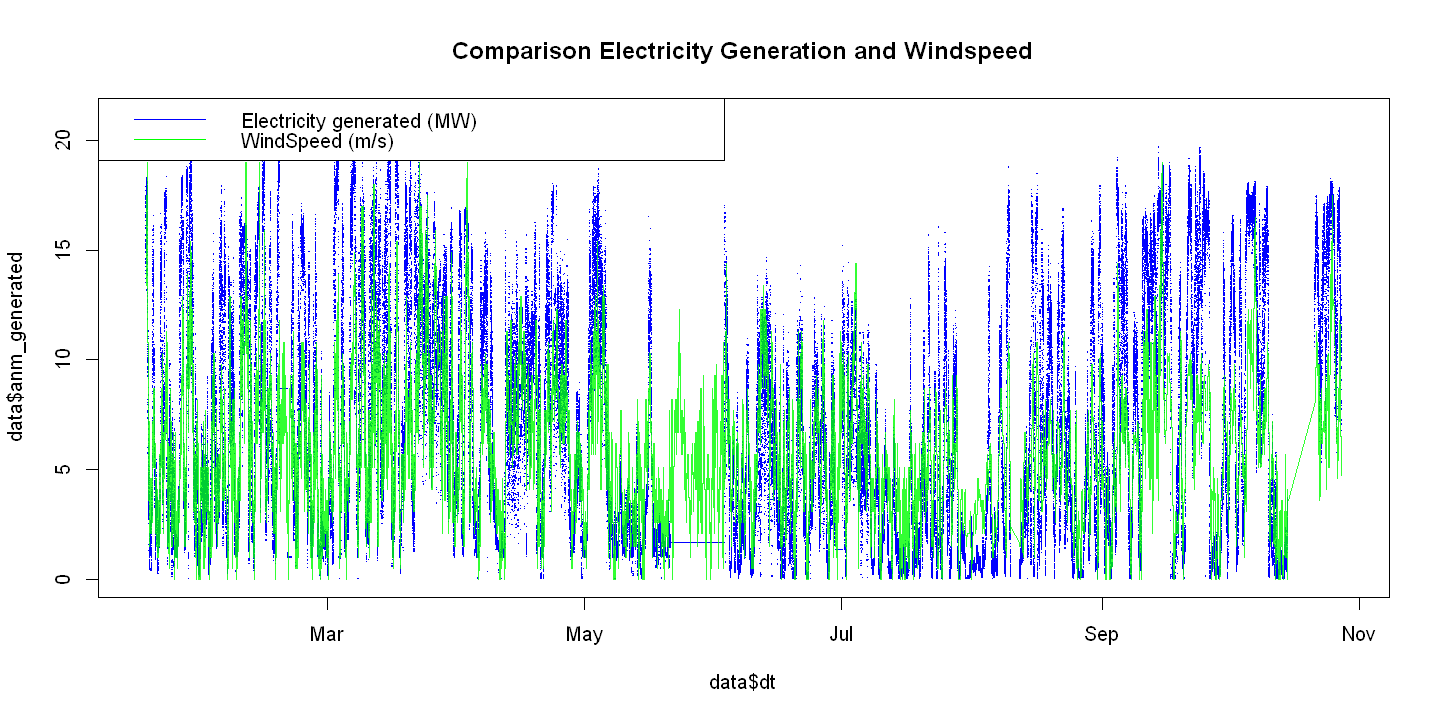

In [8]:
# plot windspeed over year
plot(data$dt, data$anm_generated, main= "Comparison Electricity Generation and Windspeed", type= "p", col = alpha(c("blue", 0.5)), pch=46,)
points(data$dt, data$approxWindSpeed, type= "l", col=alpha(c("green"), 0.8))
legend("topleft", legend=c("Electricity generated (MW)", "WindSpeed (m/s)"),
       col=c("blue", "green"), lty=1)